Trong bài này tôi sẽ đề cập tới một số kỹ thuật để tiền xử lý data (data lưu dưới dạng file bảng)

**features:** đặc trưng \
**labels:** nhãn

### 0. Thêm thư viện

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### 1. Dữ liệu người dùng ngưng dùng sản phẩm (Customer churn)

#### A. Nhiệm vụ 1: Sử dụng pandas để đọc dữ liệu từ file csv

In [45]:
dataset = pd.read_csv('./data/Customer_Churn_Modelling.csv')

Chúng ta có một dataset danh sách khách hàng ngưng sử dụng sản phẩm tại thời điểm nhất định, từ đó ta có thể tính được (customer churn rate), tỉ lệ khách hàng ngưng sử dụng sản phẩm. Tỉ lệ này vô cùng quan trọng vì chi phí duy trì một khách hàng ít hơn rất nhiều so với chi phí để có thêm một khách hàng mới. Cho nên duy trì tỉ lệ này thấp là một những mục tiêu hàng đầu của các công ty.

Chúng ta có thể dự đoán một người nào đó sẽ ngưng sử dụng sản phẩm dựa trên một số yếu tố như điểm credit(CreditScore), vị trí(Geography), giới tính (Gender), tuổi (Age), thời gian công tác(Tenure), số dư tài khoản (Balance), số lượng sản phẩm đã mua (NumOfProducts), có thẻ tín dụng (HasCrCard), là thành viên hoạt động tichs cực(HasCrCard), lương dự kiến(EstimatedSalary). Đây là **đặc trưng** của chúng ta.

Và cột Exited là 0 hay 1 thể hiện là người đó ngưng dùng sản phẩm hay không. Vậy đây là cột **nhãn** của chúng ta.



Hiển thị dataset:

In [46]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Hiển thị phân bố của data.

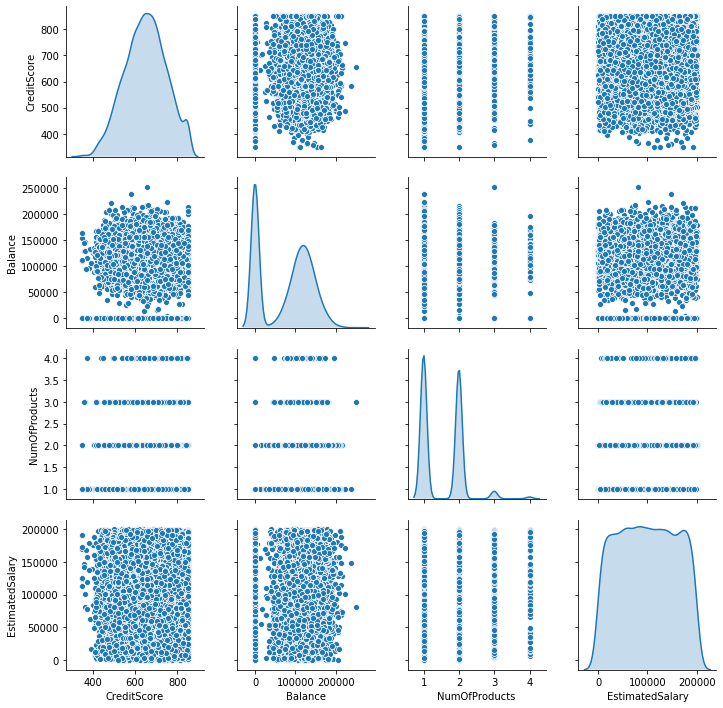

In [47]:
import seaborn as sns
sns.pairplot(dataset[["CreditScore", "Balance", "NumOfProducts", "EstimatedSalary"]], diag_kind="kde")

#### B. Nhiệm vụ 2: Tách đặc trưng và nhãn ra khỏi dataset

**Tách đặc trưng ra khỏi dataset:** Ta dùng hàm **loc** để lọc từ cột "CreditScore" cho đến cột "EstimatedSalary". Rõ ràng ta thấy những giá trị trong cột "CustomerId" và "Surname" không ảnh hưởng gì đến chỉ số Customer Churn rate nên ta sẽ không sử dụng nó trong dữ liệu để train.

In [48]:
X = dataset.loc[:, "CreditScore":"EstimatedSalary"]

**Tách nhãn ra khỏi dataset**

In [49]:
y = dataset["Exited"]

Code bên trên có kết quả tương đương với nhưng chú ý hàm pop sẽ xoá cột "Exited" ra khỏi dataset

In [50]:
y = dataset.pop("Exited")

In số một phần tử đầu trong dữ liệu để kiểm tra kết quả. \
Có hai hàm: X.head() để in các phần tử nằm đầu, X.tail() để in các phần tử nằm cuối.

In [51]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

#### C. Nhiệm vụ 3: Chuyển dữ liệu từ chữ thành số

##### Cột Geography

Nhận thấy cột Geography chứa dữ liệu chữ nên ta cần chuẩn hoá dữ liệu số. Ví dụ có 3 nước Spain, France, Germany ta có thể chuyển thành 3 giá trị số 0, 1, 2. Thực hiện chuyển hoá

In [67]:
geolabel = LabelEncoder()
X["Geography"] = geolabel.fit_transform(X["Geography"])

Kiểm tra kết quả

In [68]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


##### Cột Gender

Rõ ràng chỉ có 2 giới tính là Male và Female nên kết quả chỉ có 2 giá trị là 0 và 1

In [102]:
genderlabel = LabelEncoder()
X["Gender"] = geolabel.fit_transform(X["Gender"])

In [103]:
X.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52
9999,792,0,0,28,4,130142.79,1,1,0,38190.78


#### D. Nhiệm vụ 4: Kiểm tra giá trị không phải số (NAN) tồn tại trong bảng

Kiểm tra số giá trị NAN tại các cột

In [104]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Xoá các hàng có chứa dữ liệu này

In [105]:
dataset = dataset.dropna()

#### E. Nhiệm vụ 5: Tách dataset thành dữ liệu test và train

Tách theo tỉ lệ test/train là 1/4. 4 phần data dùng để train và 1 phần để test độ chính xác (accuracy)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify=y)

In [107]:
X_train.shape

(8000, 10)

In [108]:
X_test.shape

(2000, 10)

In [109]:
X_train.index

Int64Index([ 493, 6839,  170, 4958, 4271,  348, 9555, 7634, 9801,  596,
            ...
            1432, 2795, 7112, 1733, 8522, 6727, 4674, 6399,  872, 8389],
           dtype='int64', length=8000)

In [110]:
X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

#### F. Nhiệm vụ 6: Chuẩn hoá dữ liệu

Tại sao cần chuẩn hoá: Chuẩn hoá sẽ giúp cân bằng mức độ ảnh hưởng đến nhãn của các đặc trưng. Nếu chúng ta không chuẩn hoá thì như bạn thấy giá trị trong cột EstimatedSalary đang quá lớn so với cột Gender. Nếu giữ nguyên data này để train thì việc thêm Gender là không có nhiều ý nghĩa. Kết quả sẽ chỉ phụ thuộc chủ yếu vào đặc trưng EstimatedSalary -> Không công bằng. Ta cần đưa về một phân bố sao cho các đặc trưng tương đồng nhau hơn.

Công thức đơn giản: z = (x - u) / s

trong đó u is trung bình các đặc trưng and s độ lệch chuẩn.

In [111]:
scaler = StandardScaler()

In [112]:
X_train_not_data_frame = scaler.fit_transform(X_train)

Bạn có thể thấy các giá trị đặc trưng đã trở nên tương đồng hơn

In [114]:
X_train_not_data_frame

array([[-1.24021723, -0.90267262, -1.09665089, ..., -1.54963239,
        -1.03849022,  1.64099027],
       [ 0.75974873,  0.30491617,  0.91186722, ...,  0.64531434,
         0.96293637, -1.55587522],
       [-1.72725557, -0.90267262, -1.09665089, ...,  0.64531434,
        -1.03849022,  1.1038111 ],
       ...,
       [-0.51484098,  0.30491617,  0.91186722, ..., -1.54963239,
         0.96293637, -1.01507508],
       [ 0.73902369, -0.90267262, -1.09665089, ...,  0.64531434,
         0.96293637, -1.47887193],
       [ 0.95663657,  1.51250495,  0.91186722, ...,  0.64531434,
        -1.03849022,  0.50945854]])

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Tương tự ta cũng cần chuẩn hoá X_test

In [115]:
X_test = scaler.fit_transform(X_test)

Vậy là ta đã có bộ data chuẩn để training. Các bài tiếp theo sẽ sử dụng Neural Network để tiến hành train model dự đoán khách hàng sẽ ngưng dùng sản phẩm. Các bạn đọc tiếp nhé.

In [119]:
X_train_data_frame = pd.DataFrame(X_train_not_data_frame, index=X_train.index, columns=X_train.columns)

In [120]:
X_train_data_frame

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
493,-1.240217,-0.902673,-1.096651,0.779861,0.353903,-1.234514,-0.902981,-1.549632,-1.038490,1.640990
6839,0.759749,0.304916,0.911867,-0.273827,0.353903,0.285421,0.813713,0.645314,0.962936,-1.555875
170,-1.727256,-0.902673,-1.096651,-0.944356,-0.339090,0.855696,-0.902981,0.645314,-1.038490,1.103811
4958,0.044735,-0.902673,0.911867,-0.178037,0.353903,0.518006,0.813713,0.645314,-1.038490,-1.709357
4271,-1.924143,-0.902673,0.911867,-0.561197,0.007406,-1.234514,0.813713,-1.549632,0.962936,-0.375574
...,...,...,...,...,...,...,...,...,...,...
6727,0.977362,-0.902673,-1.096651,-0.273827,1.393393,-1.234514,-0.902981,0.645314,-1.038490,-1.400204
4674,2.065426,0.304916,0.911867,0.205122,-1.378581,1.608218,0.813713,-1.549632,0.962936,0.441249
6399,-0.514841,0.304916,0.911867,0.875651,1.393393,1.394116,-0.902981,-1.549632,0.962936,-1.015075
872,0.739024,-0.902673,-1.096651,-0.369617,-1.032084,1.399146,0.813713,0.645314,0.962936,-1.478872
